# Step 01 - Loading Dataset

In [2]:
from tensorflow.keras.datasets import mnist

#For Visualization
import matplotlib.pyplot as plt

In [3]:
#Split dataset into training and testing sets
#load_data() automatically splits dataset into training and testing
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [4]:
x_train.shape #60,000 training examples

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
x_train[:5]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
   

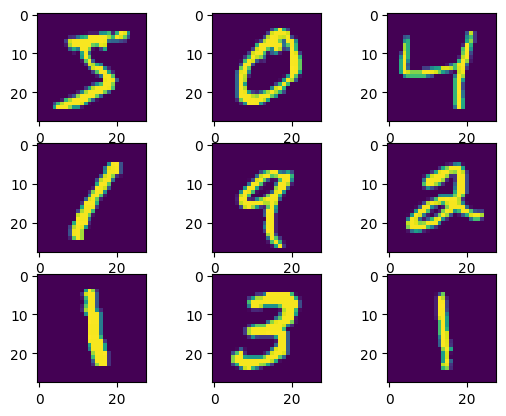

In [7]:
#Displaying some numbers
for i in range(9):
    plt.subplot(330+1+i)
    plt.imshow(x_train[i])
plt.show()


# Step 2 - Building a model

In [8]:
#[When a feature is present only that bit is set to 1 rest all 0] ---> One hot encoding
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)

In [9]:
y_train[:5]
#First line in y_train represents 5 as '1' is present in position 5

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [10]:
#Do same for test data
y_test = to_categorical(y_test)

In [11]:
#Defining model for CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense, Flatten,MaxPooling2D
from tensorflow.keras.optimizers import SGD

def define_model():
    model = Sequential()
    model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer="he_uniform",input_shape=(28,28,1)))
    model.add(MaxPooling2D(2,2))
    model.add(Flatten())
    model.add(Dense(100,activation='relu',kernel_initializer="he_uniform"))
    model.add(Dense(10,activation='softmax'))
    opt = SGD(momentum=0.9)
    model.compile(optimizer=opt,loss='CategoricalCrossentropy',metrics=['accuracy'])
    return model


In [12]:
#This shape is essential for CNNs, as they expect the input data
#to have this 4D format: (number of samples, height, width, channels).
x_train.shape[0],28,28,1

(60000, 28, 28, 1)

In [13]:
x_train = x_train.reshape((x_train.shape[0],28,28,1))

In [14]:
x_test = x_test.reshape((x_test.shape[0],28,28,1))

In [15]:
#For normalization
x_train = x_train/255.0
x_test = x_test/255.0

In [16]:
model = define_model()

C:\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
H = model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test),batch_size=32)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 1.0000 - loss: 4.8960e-04 - val_accuracy: 0.9870 - val_loss: 0.0478
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 1.0000 - loss: 4.4945e-04 - val_accuracy: 0.9873 - val_loss: 0.0509
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 1.0000 - loss: 4.2728e-04 - val_accuracy: 0.9872 - val_loss: 0.0499
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 1.0000 - loss: 3.6146e-04 - val_accuracy: 0.9868 - val_loss: 0.0498
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 1.0000 - loss: 3.3946e-04 - val_accuracy: 0.9871 - val_loss: 0.0505
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 1.0000 - loss: 2.8855e-04 - val_accuracy: 0.9872 - val_loss: 0.0514
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 1.0000 - loss: 2.7823e-04 - val_accuracy: 0.9872 - val_loss: 0.0517
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12

In [32]:
test_loss,test_acc=model.evaluate(x_test,y_test) #evaluate the modelfor the test set
#Print the accuracy and the loss of the model
print("Loss=%.3f"%test_loss)
print("Accuracy=%.3f"%test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9837 - loss: 0.0697
Loss=0.053
Accuracy=0.987


In [18]:
y_output = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


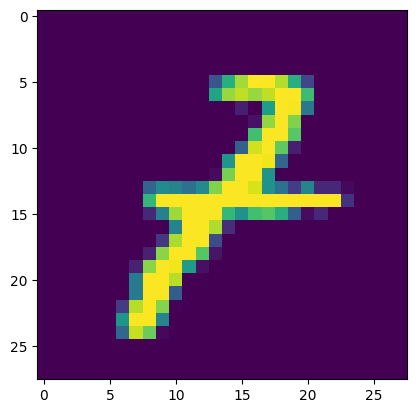

In [19]:
import random
n = random.randint(1,10000)
plt.imshow(x_test[n])

In [20]:
pred_num = max(y_output[n])
for i in range(len(y_output[n])):
    if(y_output[n][i] == pred_num):
        print("Predicted number is: ",i)
        break

Predicted number is:  7


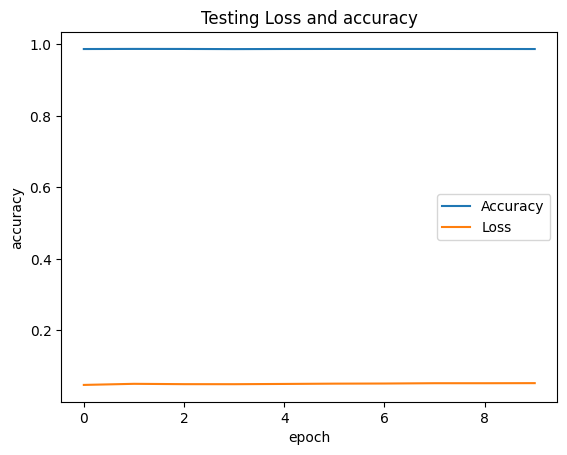

In [33]:
#my addition to the code
import matplotlib.pyplot as plt
plt.plot(H.history['val_accuracy']) #get the accuracy for the validation set from the model's history attribute
plt.plot(H.history['val_loss']) #get the loss for the validation set from the model's history attribute
plt.title('Testing Loss and accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Accuracy', 'Loss'])

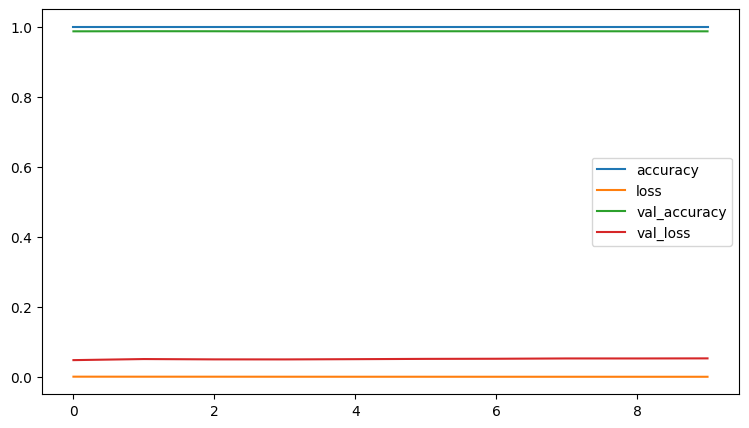

In [34]:
import pandas as pd
pd.DataFrame(H.history).plot(figsize=(9,5))
plt.show()